<div style="text-align: left;" role="presentation">
<h1 role="presentation"><strong><span role="presentation">Lecci&oacute;n 9 Miércoles 20 de Mayo</span></strong></h1>

## Vecindarios y Convoluciones

### 1. Vecindarios

* La función promedio que se vió en lecciones anteriores es un ejemplo del procesamiento por vecindario ya que significa modificar un pixel, utilizando la información de los pixeles que lo rodean.

* Las operaciones que se realizan en un procesamiento por vecindario, normalmente siguen los siguientes pasos: Sea $A\in\mathbb{R}^{m\times n}$ una imagen a escala de grises:
    
    1. Definir un píxel de la imagen: $A_{i,j}$
    
    2. Desarrollar una operación que involucre los pixeles del vecindario: $A_{i-1,j-1}, A_{i-1,j}, ..., A_{i+1,j+1}$
    
    3. Sea $B\in\mathbb{R}^{m\times n}$ la imagen de la salida. Aplicar el resultado de la operación en la misma coordenada $(i,j)$ de la imagen $B$
    
    4. Repetir el proceso para todos los pixeles.
    
    
* **NOTA:** En esta parte del curso, estudiaremos un conjunto de métodos relacionados con el procesamiento por vecindario que indica la operación de convolución.

### 2. Convolución en 1D para vectores de dimensión infinita.

* Sea $x,y$ dos vectores de dimensión infinitos:

$$x=[...,x_{-3},x_{-2},x_{-1},x_{0},x_{1},x_{2},x_{3},...]$$
$$y=[...,y_{-3},y_{-2},y_{-1},y_{0},y_{1},y_{2},y_{3},...]$$

* La convolución entre $x$ y $y$ es el vector $Z$ de dimensión infinita definida por

$$z_{j} = (x \ast y)_{j} = \sum_{i = -\infty}^{\infty} x(i)*y(j-i)$$

### 3. Convolución en 1D para vectores de dimensión finita.

* Sea $x=[x_{i},...,x_{m}]^{T} \in\mathbb{R}^{m}$ y $y_{-1}=[y_{i},...,y_{n}]^{T} \in\mathbb{R}^{n}$.. Entonces la convolución de $x,y$ es el vector $z\in\mathbb{R}^{m\times n}$, definido por:

$$z=(x\ast y)_{j} = \sum_{j} x_{j} * y_{i-j+1}$$

donde $j\in\mathbb{} \{ max(1, i+1-n), ... ,min(i,m) \}$

In [1]:
% Ejemplo de Convolucion en 1D
clc; clear;

x = rand(1,100); m = length(x);
y = rand(1,100); n = length(y);

z=zeros(1,m+n-1); % crear vector donde se almacena la convolucion

%Realizar la covolucion
tic
for i = 1:m+n-1
    v_in = max([1 i+1-n]);
    v_fin = min([i m]);
    for j = v_in:v_fin
        z(i)= z(i)+x(j)*y(i-j+1);
    end
end
t1 = toc

% Comando de Octave
tic
zz=conv(x,y);
t2 = toc

norm(z-zz)

t1 =  0.28745
t2 =  0.40196
ans =    7.9336e-14


### 4. Convolución en 2D para matrices de dimensión finita

* Sea $A\in\mathbb{R}^{m\times n}$, $B\in\mathbb{R}^{m\times n}$. La convolución de $A$ y $B$ es una matriz $C \in\mathbb{R}^{(m_{1}+m_{2}-1)\times (n_{1}+n_{2}-1)}$ definida por:

$$C_{j,k} = (A \ast B)_{jk} = \sum_{p} \sum_{q} A_{pq} \cdot B_{j-p+1, k-q+1}$$

donde 

$$p \in \left \{ max(1,j-m_{2}+1), ...,min(j,m_{1}) \right \}$$

$$q \in \left \{ max(1,k-n_{2}+1), ...,min(k,n_{1}) \right \}$$

* Tarea: Implementar la fórmula de convolución de matrices y calcule $A \ast B$, donde

$$A = \begin{bmatrix}-2 & 1 & 2\\ 1& 2 & 3\\ 1& 1 & 1\end{bmatrix}$$

$$B = \begin{bmatrix}-4 & 3 & 4\\ 0& 0 & 0\end{bmatrix}$$

* **Nota:** En GNU Octave, el comando `conv2(A,B)` realiza la convolución entre las matrices $A$ y $B$

In [2]:
%Aqui va la tarea%

### 5. Aplicación de la convolución en imágenes

#### a. Filtro Paso-Alto

* Sea $A\in\mathbb{R}^{m\times n}$ una imagen en escala de grises. Sea $B\in\mathbb{R}^{3\times 3}$.

* Dependiendo del valor de $B$, se puede aplicar una tranformación a la imagen A, a traves de la convolución.

$$B = \begin{bmatrix}0 & -1 & 0\\ -1& 5 & -1\\ 0& 0 & 0\end{bmatrix}$$

* Entonces  $B$ es un filtro paso altos.

* Note que $A \ast B \in\mathbb{R}^{(m+2)\times(m+2)}$. Por lo tanto en imágenes eliminaremos la primera y última fila, y la primera y ultima columna.

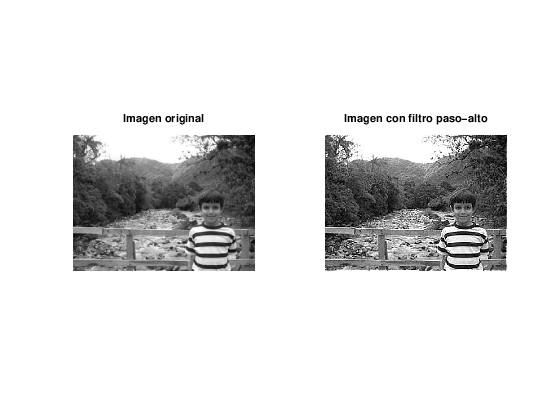

In [3]:
%Ejemplo de comvolucion en imagenes%
clc; clear

pkg load image

A = imread("files/child.jpg");
subplot(1,2,1)
imshow(A);
title("Imagen original")

%Crea matriz A
B = [0 -1 0; -1 5 -1; 0 -1 0]; % Filtro Paso-Alto
A = double(A);
C = conv2(A,B); % Convolucion de A y B

[m,n] = size(A);

C = uint8(C(2:m+1, 2:n+1));

subplot(1,2,2)
imshow(C);
title("Imagen con filtro paso-alto")

#### b. Filtro Paso-Bajo

* Sea $A\in\mathbb{R}^{m\times n}$ una imagen en escala de grises. Sea $B\in\mathbb{R}^{3\times 3}$.

* Si $B$ es tal que

$$B=\begin{bmatrix}0 & -1 & 0\\ -1& 5 & -1\\ 0& 0 & 0\end{bmatrix}$$

* $B$ es un filtro paso-bajo.

#### c. Filtro Paso-Bajo

* Sea $A\in\mathbb{R}^{m\times n}$ una imagen en escala de grises. Sea $B\in\mathbb{R}^{3\times 3}$.

* Si $B$ es tal que

$$B=\begin{bmatrix}0 & -1 & 0\\ -1& 5 & -1\\ 0& 0 & 0\end{bmatrix}$$

* $B$ detecta bordes horizontales

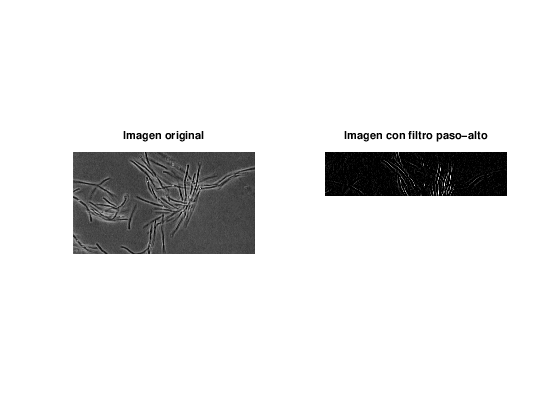

In [4]:
%Detectar bordes Horizontales%
clc; clear

pkg load image

A = imread("files/bacteria.jpg");
subplot(1,2,1)
imshow(A);
title("Imagen original")

%Crea matriz A
%B = [1 1 1;0 0 0;-1 -1 -1]; % Bordes Horizontales
B = [1 0 -1;1 0 -1;1 0 -1]; % Bordes Verticales
%B = [-1 -1 -1;-1 8 -1;-1 -1 -1]; % Bordes Verticales
A = double(A);
C = conv2(A,B); % Convolucion de A y B

[m,n] = size(A);

C = uint8(C(2:m+1, 2:n+1));

subplot(1,2,2)
imshow(C);
title("Imagen con filtro paso-alto")

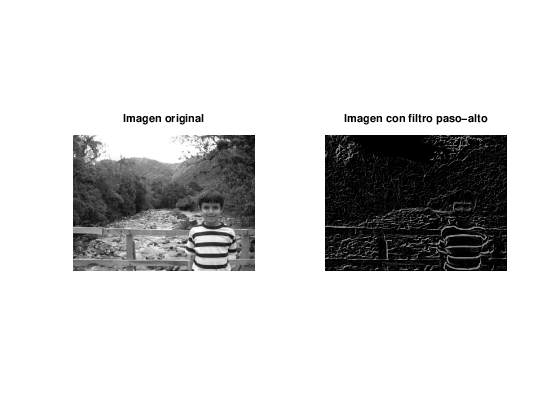

In [5]:
%Detectar bordes usando dos filtros%
clc; clear

pkg load image

A = imread("files/child.jpg");
subplot(1,2,1)
imshow(A);
title("Imagen original")

%Crea matriz A
B1 = [1 1 1;0 0 0;-1 -1 -1]; % Bordes Horizontales
B2 = [1 0 -1;1 0 -1;1 0 -1]; % Bordes Verticales
%B = [-1 -1 -1;-1 8 -1;-1 -1 -1]; % Bordes Verticales
A = double(A);[m,n] = size(A);
C1 = conv2(A,B1); % Convolucion de A y B
C2 = conv2(A,B2); % Convolucion de A y B

C1 = uint8(C1(2:m+1,2:n+1));
C2 = uint8(C2(2:m+1,2:n+1));



C = uint8((C1 + C2)/2);

subplot(1,2,2)
imshow(C);
title("Imagen con filtro paso-alto")